## Exe. 1

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
    pass

# Exe. 2

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# Exe. 3

In [ ]:
print(tf.__version__)

2.4.1


# Exe. 4

In [ ]:
data = keras.datasets.cifar10
cifar10_data = data.load_data()

170500096/170498071 [==============================] - 4s 0us/step


# Exe. 5

In [ ]:
print(type(cifar10_data))
print(len(cifar10_data))

<class 'tuple'>
2


# Exe. 6

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10_data

# Exe. 7

In [ ]:
print(train_images[0]) # We cann see that we a 3-dimensional array the following dimension (row, column, pixel)
print(train_images[0].shape)
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
(32, 32, 3)


# Exe. 8

In [ ]:
print(f"Number of train set observation: {len(train_labels)}")
print(f"Number of test set observation: {len(test_labels)}")
print(f"Shapes of the train features matrix: {train_images.shape}")
print(f"Shapes of the test features matrix: {test_images.shape}")

Number of train set observation: 50000
Number of test set observation: 10000
Shapes of the train features matrix: (50000, 32, 32, 3)
Shapes of the test features matrix: (10000, 32, 32, 3)


We can see that the observations are 32x32 images. The `3`in the shape is how the pixels are encoded (red, green, blue)

# Exe. 9

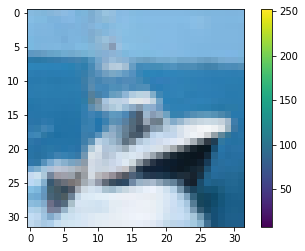

array([8], dtype=uint8)

In [ ]:
index = 8
plt.figure()
plt.imshow(train_images[index])
plt.colorbar()
plt.grid(False)
plt.show()

train_labels[index]

Exe. 10

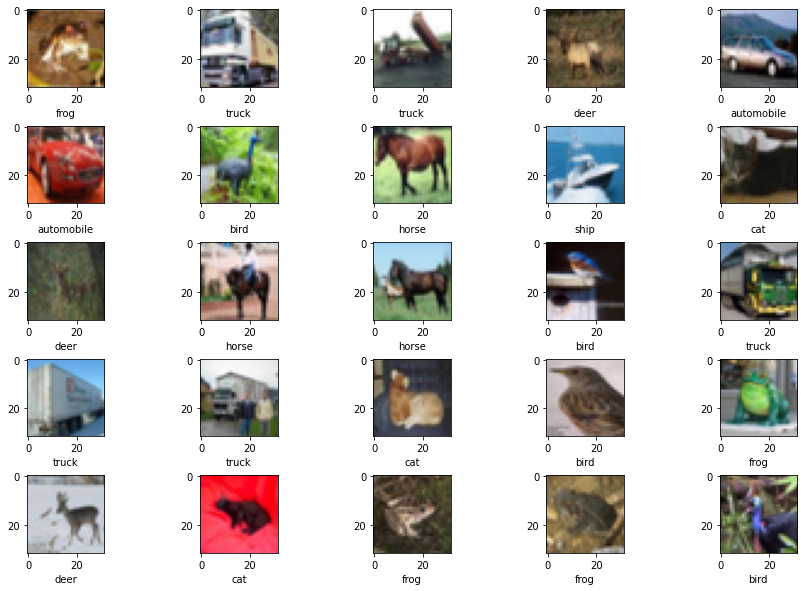

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15,10)) # We construct a figure containing 25 plot, 5 plots each row
plt.subplots_adjust(hspace=0.5) # Add some space between the plot (to see the label)
for i in range(5):
    for j in range(5):
        index = i * 5 + j
        axs[i, j].imshow(train_images[index])
        axs[i, j].set_xlabel(class_names[train_labels[index][0]])


# Exe. 11

In [ ]:
# Here we divide each the values in the training and testing set by 255.
# Each value in those sets is a part of a pixel (red, green or blue) taking a value between 0 and 255.
# By dividing them by 255 we normalize our training and testing set and all the values in those sets will take a value between 0 and 1
train_images = train_images / 255.0 
test_images = test_images / 255.0

# Exe. 12

In [ ]:
# Here we construct the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)), # Input layer taking 3-dimensional arrays
    keras.layers.Dense(128, activation='relu'), # Hidden layer with 128 neuron. We use the `relu` function which is an activation function define as relu(x) = max(x, 0)
    keras.layers.Dense(10, activation='softmax'), # Output layer using the `softmax` activation function. The softmax takes as input a vector and output a vector of the same dimension.
                                                  # The output vector is used to represents the probability of the input image  to belong to a certain class.
])

# Exe. 13 

In [ ]:
model.compile(optimizer='adam', # adam is an algorithm to optimize the weights of the model.
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # The accuracy represents the number of valid classification on the total number of observation

# Exe. 14

In [ ]:
model.fit(train_images, train_labels, epochs=10) # Now we train our model using the training set. The number of epochs represents the number of time the model will train itself on the training set

Epoch 1/10
1563/1563 [==============================] - 5s 2ms/step - loss: 2.0144 - accuracy: 0.2682
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7962 - accuracy: 0.3543
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7516 - accuracy: 0.3713
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7111 - accuracy: 0.3878
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6815 - accuracy: 0.3957
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6734 - accuracy: 0.4028
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6336 - accuracy: 0.4151
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6255 - accuracy: 0.4179
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6169 - accuracy: 0.4240
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.598

# Exe. 15

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) # We test the model on the testing set, we retrieve the loss and the accuracy

313/313 - 0s - loss: 1.6132 - accuracy: 0.4200


# Exe. 16

In [ ]:
predictions = model.predict(test_images) 

In [ ]:
predicted_values = [[np.argmax(predictions[i]), np.amax(predictions[i])] for i in range(len(predictions))] # We get the biggest value and its index. predicted_value is a list of the form [(maxindex), (maxvalue), ...]

# Exe. 17

# Exe. 18

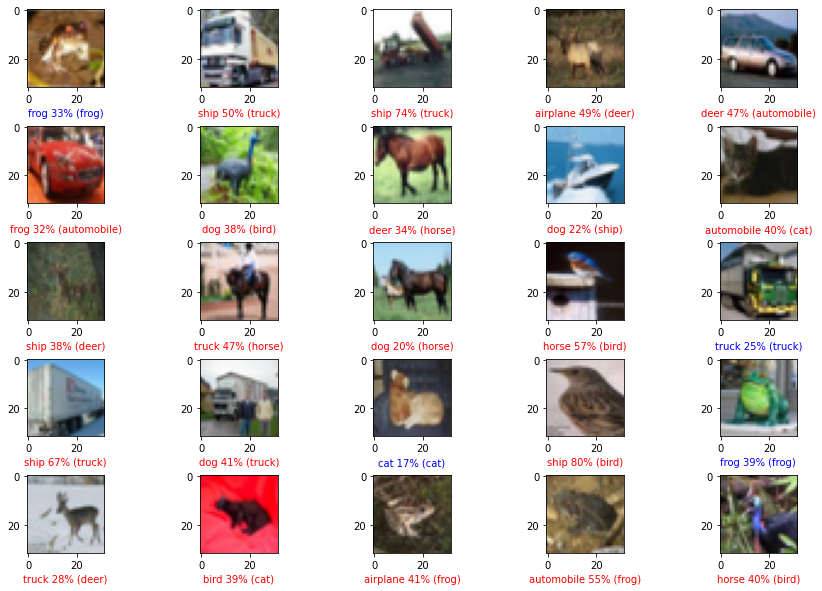

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
for i in range(5):
    for j in range(5):
        index = i * 5 + j
        axs[i, j].imshow(train_images[index])
        true_class = class_names[train_labels[index][0]] # Retrieve the true label of the image
        predicted_class = class_names[predicted_values[index][0]] # Retrieve the predicted label
        percent = int(predicted_values[index][1] * 100) # Convert the probabilty for the display
        color = 'red' if true_class != predicted_class else 'blue' # Display the label in red if the observation is misclassified
        axs[i, j].set_xlabel(f"{predicted_class} {percent}% ({true_class})")
        axs[i, j].xaxis.label.set_color(color)

In [ ]:
expanded_image = np.expand_dims(test_images[5], axis=(0)) # The model expect an array of image as input, to send one image we need to convert it to an array of size one.
model.predict(expanded_image)

array([[0.01770664, 0.0198343 , 0.14791691, 0.1674253 , 0.14708912,
        0.1268574 , 0.32547677, 0.0300207 , 0.00083162, 0.01684124]],
      dtype=float32)

# Ex. 19

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(1024, activation='relu'), # Here we tried to add layer with a power of two nodes and decrease the number of node for each layer
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])
# compile model
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 2.0430 - accuracy: 0.2728
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6874 - accuracy: 0.3916
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5945 - accuracy: 0.4262
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5299 - accuracy: 0.4502
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4779 - accuracy: 0.4700
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4444 - accuracy: 0.4821
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4129 - accuracy: 0.4924
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3810 - accuracy: 0.5038
Epoch 9/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3583 - accuracy: 0.5104
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.325

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) # We achieve 0.48 accuracy with this model

313/313 - 0s - loss: 1.4338 - accuracy: 0.4930
